# Classification

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.[5] Furthermore, the black and white images from NIST were normalized to fit into a 20x20 pixel bounding box and anti-aliased, which introduced grayscale levels.


Scikit-Learn provides many helper functions to download popular dataset: sklearn.datasets.fetch_mldata('MNIST original')
- a DESCR key decribing the dataset
- a DATA key containing an array with one row per instance and one column per feature
- a target key containing an array with the labels

In [3]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

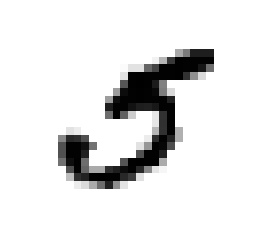

In [6]:
some_digits = X[36000]
some_digit_image = some_digits.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = 'nearest')
plt.axis('off')
some_digit_image

In [7]:
y[36000]

5.0

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [9]:
# split the data in training and test set
train_x, test_x, train_y, test_y = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle the training set
shuffle_index = np.random.permutation(60000)
train_x, train_y = train_x[shuffle_index], train_y[shuffle_index]

# Training a Binary Classifier
It will determine if a sample is a '5' or not

In [13]:
# True for all 5s, False for all other digits
train_y_5 = (train_y == 5)
test_y_5 = (test_y == 5)

### StochasticGradientDescent
Scikit-Learn provides SGDClassifier

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 16)
sgd_clf.fit(train_x, train_y_5)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=16, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [16]:
sgd_clf.predict([some_digits])

array([ True], dtype=bool)

### Performance Measures
- Scikit-learn  off-the-shell Cross-Validation (cross_val_scare())
- Implementing Cross-Validation (StratifiedKFold)

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 16)

for train_index, test_index in skfolds.split(train_x, train_y_5):
    clone_clf = clone(sgd_clf)
    train_x_folds = train_x[train_index]
    train_y_folds = (train_y_5[train_index])
    test_x_folds = train_x[test_index]
    test_y_folds = (train_y_5[test_index])
    
    clone_clf.fit(train_x_folds, train_y_folds)
    pred = clone_clf.predict(test_x_folds)
    n_correct = sum(pred == test_y_folds)
    print(n_correct / len(pred))

0.93645
0.9106
0.9599


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_x, train_y_5, cv = 3, scoring='accuracy')

array([ 0.93645,  0.9106 ,  0.9599 ])

In [20]:
# lets try out an other dumb binary classifier model that never predicts a 5
# and always predict False
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
never_clf = Never5Classifier()
cross_val_score(never_clf, train_x, train_y_5, cv = 3, scoring = 'accuracy')

array([ 0.90815,  0.91255,  0.90825])

In [21]:
# it's above 90% because only the 10% is a 5, so if you always guess
# that an image is not a 5 you will be right 90% of the time
# we can evaluate the model much better using a confusion matrix
# that will show us the True Negatives (TN), False Positive (FP), False Negative (FN) and True Positive(TP)
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(sgd_clf, train_x, train_y_5, cv = 3)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_5, pred) # where 51516: TN, 3063: FP, 798: FN, 4623: TP

array([[51516,  3063],
       [  798,  4623]])

In [25]:
confusion_matrix(train_y_5, train_y_5)

array([[54579,     0],
       [    0,  5421]])

##### Precision
The accuracy of the positive predictions:

$precision = \frac{TP}{TP+FP}$

#### Recall
The ratio of positive instances that are correctly detected by the classifier

$recall = \frac{TP}{TP+FN}$


#### F1 Score
The harmonic mean of precision and recall

$F1 = \frac{2}{{\frac{1}{precision}} + {\frac{1}{recall}}} = 2 x \frac{precision x recall}{precision + recall} = 
\frac{TP}{TP + \frac{FN+FP}{2}}$

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(train_y_5, pred) # == 4623 / (4623 + 3063)

0.6014832162373146

In [31]:
recall_score(train_y_5, pred) # == 4623 / (4623 + 798)

0.85279468732706143

In [32]:
from sklearn.metrics import f1_score

f1_score(train_y_5, pred)

0.70542458228427563

### Precision-Recall tradeoff

In [33]:
y_scores = sgd_clf.decision_function([some_digits])
y_scores

array([ 77816.42221139])

In [35]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [36]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [65]:
y_scores = cross_val_predict(sgd_clf, train_x, train_y_5, cv = 3, method = 'decision_function')
y_scores[:, 1]

array([  -9158.86412141, -342974.00748033,  -54799.48919914, ...,
       -267770.6945076 , -248980.949285  ,  -73977.83981679])

In [66]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_y_5, y_scores[:, 1])

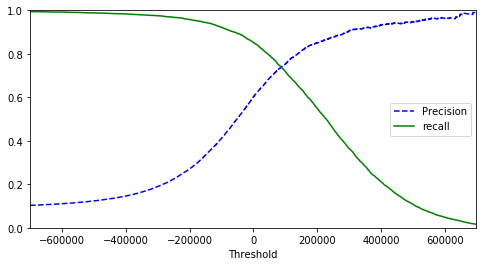

In [80]:
def plot_precision_recal_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.ylim([0,1])

plt.figure(figsize=(8, 4))
plot_precision_recal_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.savefig('precision_recall_vs_threshold_plot.png', format='png', dpi=300)

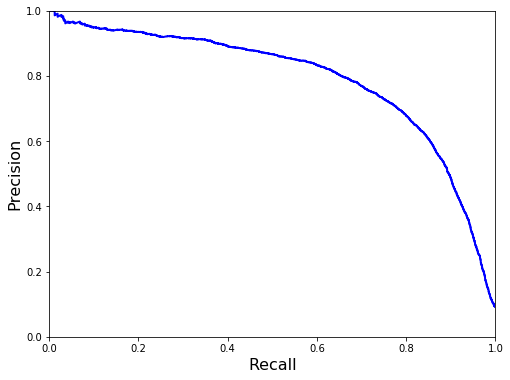

In [93]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.savefig("precision_vs_recall_plot.png", format='png', dpi=300)
plt.show()

In [87]:
y_train_pred_90 = (y_scores[:, 1] > 200000)

precision_score(train_y_5, y_train_pred_90)

0.85095468794528351

In [88]:
recall_score(train_y_5, y_train_pred_90)

0.55082088175613353

## The ROC Curve
The Receiver Operating Characteristic (ROC) curve is an other common tool used with binary classifiers.
The ROC plots the true positive rate (TPR, recall) and the false positive rate (FPR)

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_y_5, y_scores[:, 1])

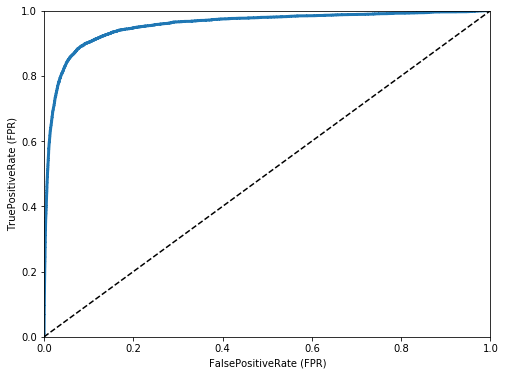

In [94]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 3, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FalsePositiveRate (FPR)')
    plt.ylabel('TruePositiveRate (FPR)')
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.savefig("roc_curve_plot.png", format='png', dpi=300)


## AUC - Area Under the Curve

In [95]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_y_5, y_scores[:, 1])

0.95588760842967635

In [96]:
# Lets train a RandomForestClassifier and compare its ROC curve and ROC AUC score of the SGDClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 16)
y_probas_forest = cross_val_predict(forest_clf, train_x, train_y_5, cv = 3, method = 'predict_proba')

In [97]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y_5, y_scores_forest)

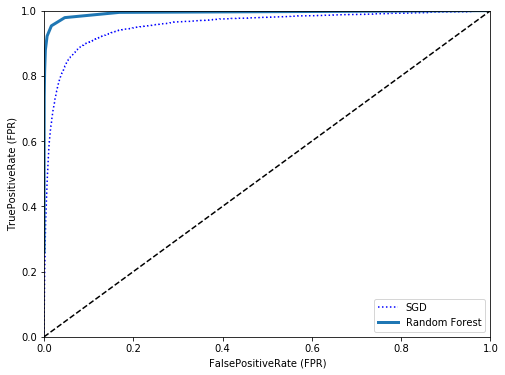

In [99]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.legend()

plt.savefig("roc_curve_comparison_plot.png", format='png', dpi=300)

In [100]:
roc_auc_score(train_y_5, y_scores_forest)

0.99354858822944214

# Multiclass Classification
Whereas binary classifiera distinguish between two classes, multicalls classifiers can distiguish between more than two classes (like Random Forest classifiers or Bayes classifiers)

- One-versus-All (OvA) - if you have to classify images with 10 different digit classes you could train 10 binary classifiers, one for each class. Then when you want to classify an image you get the decision score from each classifier
- One-versus-One (OvO) - an other strategy is to train a binary classifier for each pair of digits (1s-2s, 3s-2s,..). If there are N-Classes you need to train N x (N / 1) / 2 classifiers.

Scikit-Learn detects when you try to use binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which uses OvO)

In [101]:
sgd_clf.fit(train_x, train_y)
sgd_clf.predict([some_digits])

array([ 5.])

In [103]:
some_digits_score = sgd_clf.decision_function([some_digits]) #[5] == 77816.42221139 == max
some_digits_score

array([[  23879.65969221, -504088.24553987, -385161.55476167,
         -36855.66794802, -357238.34340791,   77816.42221139,
        -541223.40980511, -270883.65515266, -592613.82166126,
        -749001.76842281]])

In [106]:
np.argmax(some_digits_score)

5

In [105]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [107]:
sgd_clf.classes_[5]

5.0

In [111]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(train_x, train_y)
ovo_clf.predict([some_digits])

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [112]:
len(ovo_clf.estimators_)

45

In [113]:
forest_clf.fit(train_x, train_y)
forest_clf.predict([some_digits])

array([ 5.])

In [114]:
forest_clf.predict_proba([some_digits])

array([[ 0.1,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

In [115]:
cross_val_score(sgd_clf, train_x, train_y, cv = 3, scoring = 'accuracy')

array([ 0.84518096,  0.82869143,  0.8679802 ])

In [116]:
# scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x.astype(np.float64))

cross_val_score(sgd_clf, train_x_scaled, train_y, cv = 3, scoring = 'accuracy')

array([ 0.90796841,  0.91229561,  0.9079862 ])

## Error Analysis

In [117]:
y_train_pred = cross_val_predict(sgd_clf, train_x, train_y, cv = 3)
conf_mx = confusion_matrix(train_y, y_train_pred)
conf_mx

array([[5549,    2,  104,    8,   27,   70,   69,   27,   64,    3],
       [   1, 6450,   55,   18,    2,   57,    9,   21,  118,   11],
       [  29,   49, 5331,   45,   85,   61,   91,  112,  144,   11],
       [  34,   42,  463, 4338,   13,  804,   58,  108,  214,   57],
       [  14,   35,   46,    7, 5106,   58,   62,  211,  140,  163],
       [  44,   22,   73,   98,   81, 4720,  109,   53,  179,   42],
       [  33,   24,   69,    8,   47,  177, 5498,   11,   50,    1],
       [  16,   27,   62,   10,   45,   24,    5, 5916,   31,  129],
       [  38,  170,  162,  133,   40,  735,   45,  172, 4283,   73],
       [  35,   42,   37,   66,  315,  229,    3, 1379,  197, 3646]])

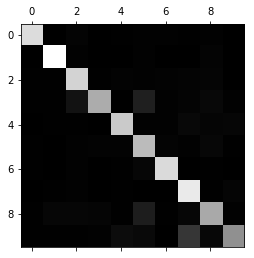

In [118]:
plt.matshow(conf_mx, cmap = plt.cm.gray)

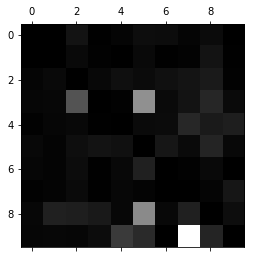

In [119]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)

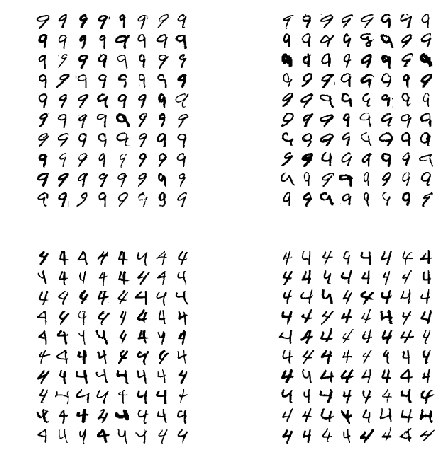

In [135]:
cl_a, cl_b = 9,4

#left blocks classified as cl_a
#right blocks classified as cl_b

X_aa = train_x[(train_y == cl_a) & (y_train_pred == cl_a)]
X_ab = train_x[(train_y == cl_a) & (y_train_pred == cl_b)]
X_ba = train_x[(train_y == cl_b) & (y_train_pred == cl_a)]
X_bb = train_x[(train_y == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:80], images_per_row=8)
plt.subplot(222); plot_digits(X_ab[:80], images_per_row=8)
plt.subplot(223); plot_digits(X_ba[:80], images_per_row=8)
plt.subplot(224); plot_digits(X_bb[:80], images_per_row=8)

# Multilabel classification

In [138]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (train_y >= 7)
y_train_odd = (train_y % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(train_x, y_multilabel)

knn_clf.predict([some_digit])

y_train_knn_pred = cross_val_predict(knn_clf, train_x, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

NameError: name 'some_digit' is not defined

# Multioutput classification

In [139]:
noise = np.random.randint(0, 100, (len(train_x), 784))
X_train_mod = train_x + noise
noise = np.random.randint(0, 100, (len(test_x), 784))
X_test_mod = test_x + noise
y_train_mod = train_x
y_test_mod = test_x

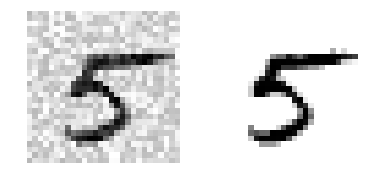

In [142]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

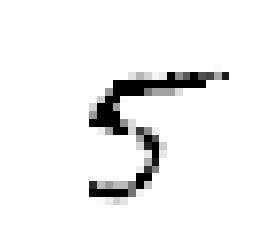

In [143]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

# KNN classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights = 'distance')

knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [11]:
predictions = knn.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, predictions)